# Final Project

After we had been guided which experiment to run in assignment 2, we were exploring on our own, hoping achieve the best accuracy for cifar10. 

In this notebook we were tuning some hyperparameters, hoping to achieve high performance.

In addition, we summarized some reading materials about BERT architecture and Vision Transformers.

### 1. YourCodeNet Model
First, we implemented YourCodeNet model and defined the model architecture using our previous assignment's insights.

common config:  {'run_name': 'exp1_L4_K128', 'out_dir': './results', 'seed': 42, 'bs_train': 50, 'bs_test': 12, 'batches': 10000, 'epochs': 30, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.001, 'reg': 0, 'pool_every': 4, 'hidden_dims': [100, 100], 'ycn': True, 'kw': {'optim': 'adam'}}


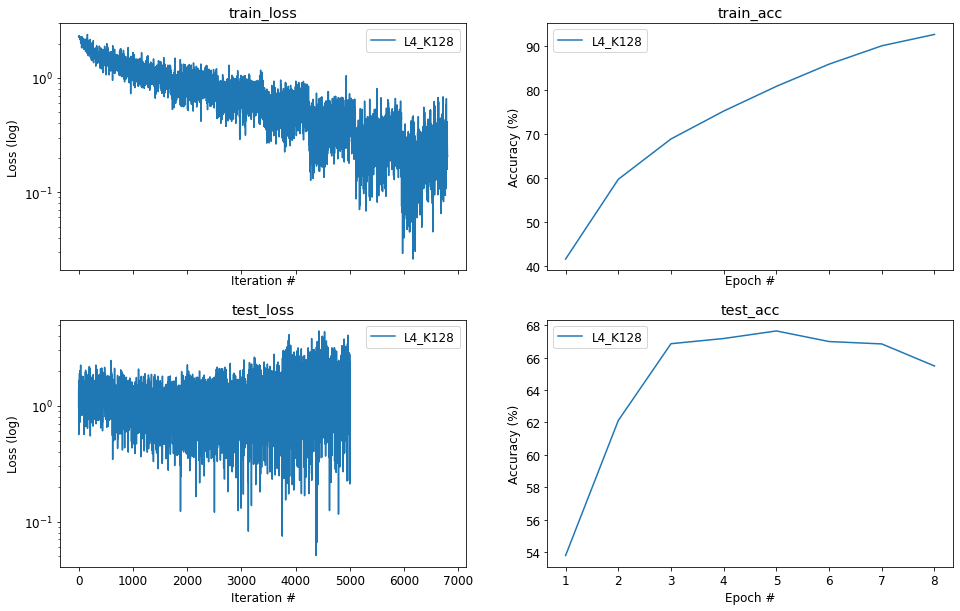

In [ ]:
plot_exp_results('exp1_L4_K128.json')

### 2. Learning Rate and Optimization Methods
Then, we tried using different optimization algorithm, choosing between Adam and SGD+Momentum and various learning rate values. 

In the simple Stochastic Gradient Descent, the process of randomly choosing a batch adds noise to the learning process and the training could converge slower than we would like. Adding momentum to the SGD process helps us lower the noise caused by our batch and therefore learn more effectively.

The Adam optimizer attempts to combine the benefits of both RMSprop (or Adagrad) and Momentum optimizers compared to the simple SGD. First, using the RMSprop technique, Adam tries to normalize the "direction" of our learning process, causing it to converge faster. Then, using Momentum, Adam is able to lower the noise caused by the randomness of choosing a batch, helping our learning process as well.

After running some experiments with both Adam and SGD+Momentum optimizers with various learning rate values, we have found that the best combination was Adam optimizer with a learning rate of 0.0003.

In conclusion, our best model achieved a train loss of 0.131, and a train accuracy of 95.6%. Unfortunately, we only reached a test loss of 1.594, and a test accuracy of 67.2%. It seems that we suffer from a massive overfit, and we will try to deal with it in the upcoming experiments.

common config:  {'run_name': 'exp2_opt_adam_lr_0.1', 'out_dir': './results', 'seed': 42, 'bs_train': 50, 'bs_test': 12, 'batches': 10000, 'epochs': 30, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.1, 'reg': 0, 'pool_every': 4, 'hidden_dims': [100, 100], 'ycn': True, 'kw': {'optim': 'adam'}}
common config:  {'run_name': 'exp2_opt_sgdm_lr_0.1', 'out_dir': './results', 'seed': 42, 'bs_train': 50, 'bs_test': 12, 'batches': 10000, 'epochs': 30, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.1, 'reg': 0, 'pool_every': 4, 'hidden_dims': [100, 100], 'ycn': True, 'kw': {'optim': 'sgdm'}}


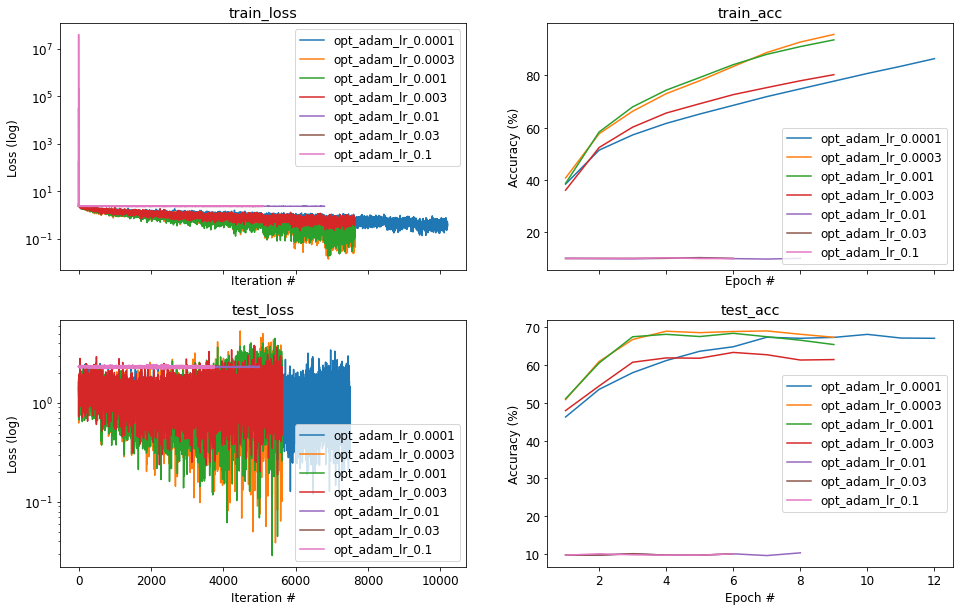

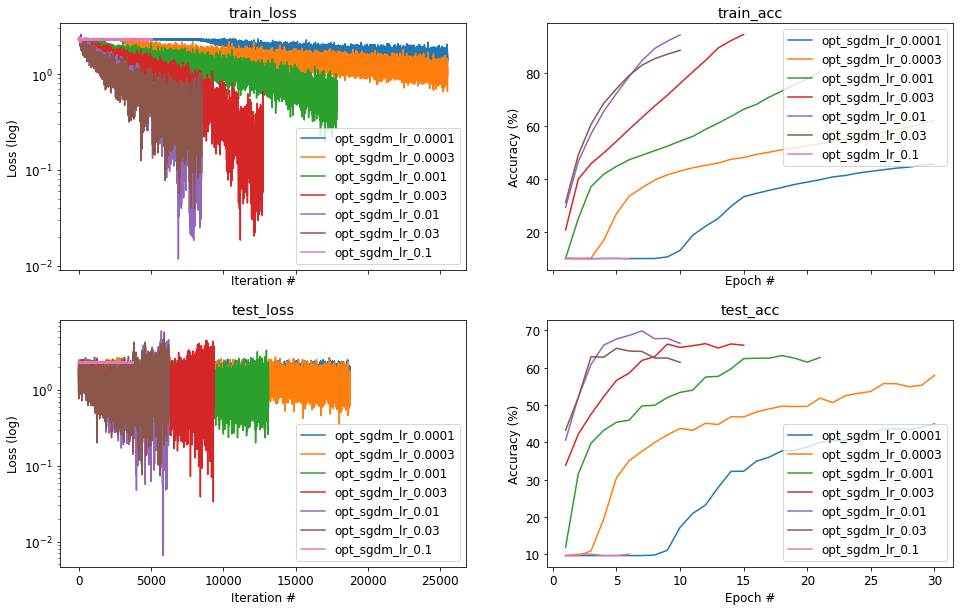

In [ ]:
for opt in optimizers:
    plot_exp_results(f'exp2_opt_{opt}*.json')

### 3. Batch Normalization
In this section, we added batch normalization to your network.

The purpose of batch normalization is to normalize the data passing through our model along each dimension independently. The direct affect of the normalization is to prevent some dimensions or features from baising our model into giving them inflated importance, thus sharing the load evenly between all the dimensions.

An additional advantage of batch normalization is that it reduces the internal covariate shift of the model, meaning that our model will adapt better to changes in the input distributions.

Another effect of batch normalization is regularization, due to the noise added by the stochasticity of choosing the batch. However, the noise is relatively small, therefore the effect is not enough to regularize properly.

After running an experiment with batch normalization, we found that our model performance had improved.

In conclusion, our model achieved a train loss of 0.064, and a train accuracy of 97.9%. Unfortunately, we only reached a test loss of 1.123, and a test accuracy of 73.4%. It seems that we still suffer from serious overfit, and we will have to deal with it in the next experiment.

common config:  {'run_name': 'exp3_batch_norm', 'out_dir': './results', 'seed': 42, 'bs_train': 50, 'bs_test': 12, 'batches': 10000, 'epochs': 30, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0003, 'reg': 0, 'pool_every': 4, 'hidden_dims': [100, 100], 'ycn': True, 'kw': {'optim': 'adam', 'batch_norm': True}}


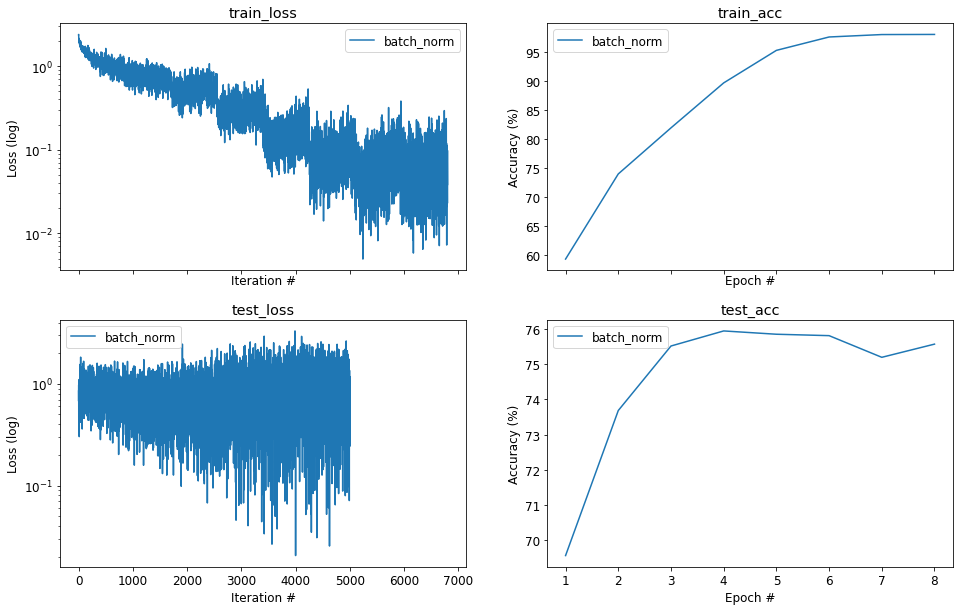

In [ ]:
plot_exp_results('exp3_batch_norm.json')

### 4. Regularization
After overfitting our data, we added regularization to your optimization. In particular we tried adding L2 regularization and dropout layers to our network.

We used regularization in order to avoid overfitting our data. In other words, our model performed very well on our training data, achieving amazing loss and accuracy, however, the validation and test performance were far from great. This means that altough our model predicts the training data almost perfectly, it will do poorly on never-seen-before samples and therefore has weak ability to generalize.

The addition of regularization makes the learning process to be harder, and therefore the train loss and accuracy was worse than before when applying enough regularization. Nevertheless, the model was able to acheive higher results on the validation and test sets.

After running some experiments with both L2 regularization and Dropout, we have found that the best reqularization method was the Dropout technique with dropout probability of 0.5.

In conclusion, our best model achieved a train loss of 0.295, and a train accuracy of 90.0%, lower than in previous experiments. On the upside, we were able to reache a test loss of 0.652, and a test accuracy 80.3%. It seems that we managed to reduce the gap between the train performance and the test performance.

common config:  {'run_name': 'exp4_reg_1', 'out_dir': './results', 'seed': 42, 'bs_train': 50, 'bs_test': 12, 'batches': 10000, 'epochs': 30, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0003, 'reg': 1, 'pool_every': 4, 'hidden_dims': [100, 100], 'ycn': True, 'kw': {'optim': 'adam', 'batch_norm': True}}


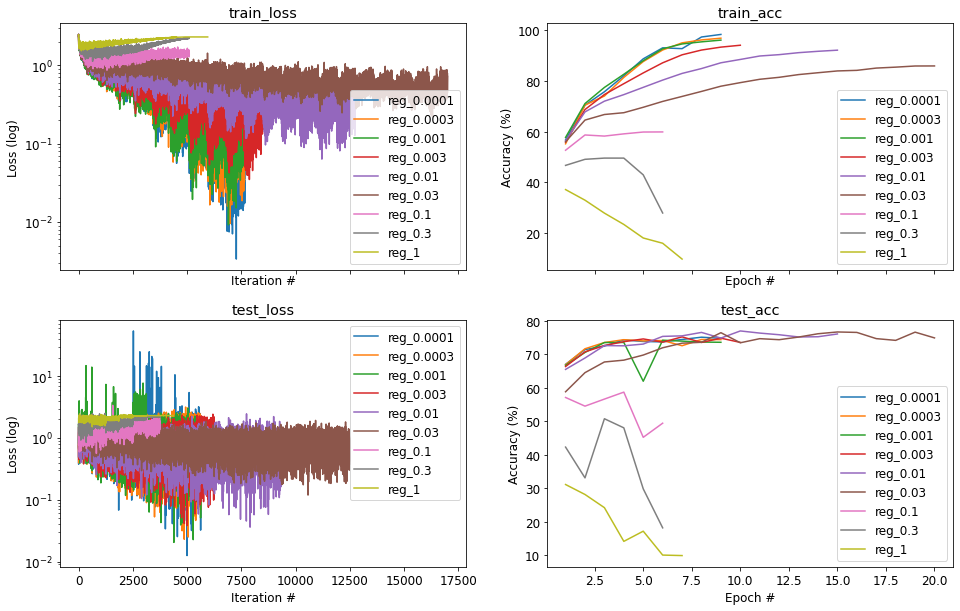

In [ ]:
plot_exp_results('exp4_reg*.json')

common config:  {'run_name': 'exp4_dropout_0.5_reg_0', 'out_dir': './results', 'seed': 42, 'bs_train': 50, 'bs_test': 12, 'batches': 10000, 'epochs': 30, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0003, 'reg': 0, 'pool_every': 4, 'hidden_dims': [100, 100], 'ycn': True, 'kw': {'optim': 'adam', 'batch_norm': True, 'dropout': 0.5}}


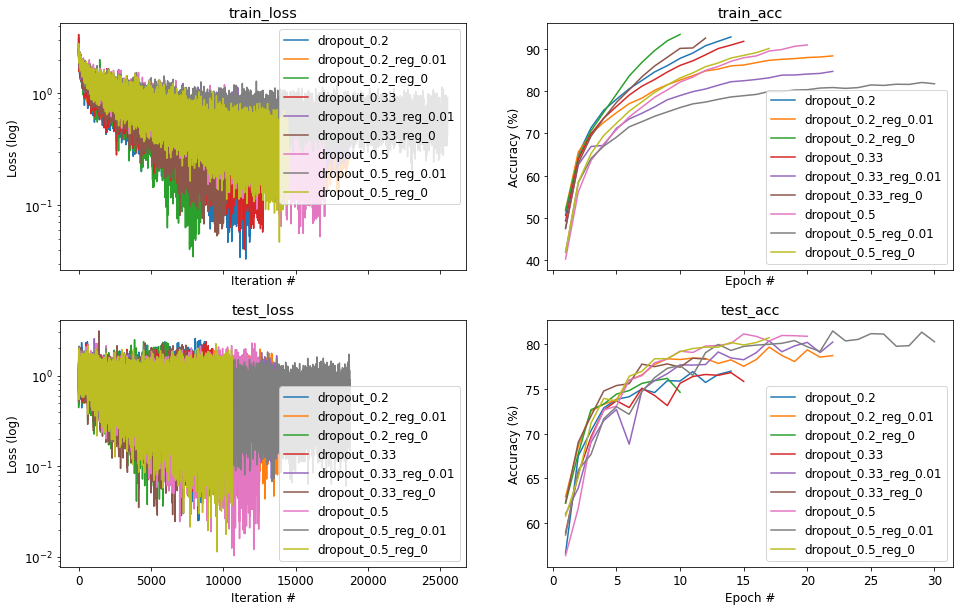

In [ ]:
plot_exp_results('exp4_dropout*.json')

### Summary Up To Here
My best model so far was a convolutional neural network with the following architecture:
- 4 convolutional blocks, each block contains a convolutional layer with 128 kernels of size 3 by 3 and a padding of 1 to maintain input size, a ReLU activation function and a Batch Normalization layer with learnable mean and standard deviation.
- A Max Pooling layer with filter size of 2 by 2
- A Dropout layer, with dropout probability of 0.5.
- 2 Linear layers, each layer contains 100 neurons with ReLU activation function, a Batch Normalization layer with learnable and standard deviation, and a Dropout layer with dropout probability of 0.5.
- The network was trained with Adam optimizer using learning rate value of 0.0003 and no weight decay.

Our best test performance had a test loss of 0.652, and a test accuracy 80.3%. Compared to our results in assignment 2, we managed to improve our model performance significantly by fine tuning our learning rate, applying Batch Normalization accross the different layers of our model, and adding some dropout layers as well.



### 5. Pretrained ResNet50

The pretrained ResNet50 model had a train loss of 0.458, and a train accuracy of 84.5%, however it had a test loss of 0.779, and a test accuracy 74.1.

Unfortunately it overfitted our data, as we can easily notice a significant gap between the train performance and test performance.

Surprisingly, compared to our own model's performance, the ResNet50 did worse. 

common config:  {}


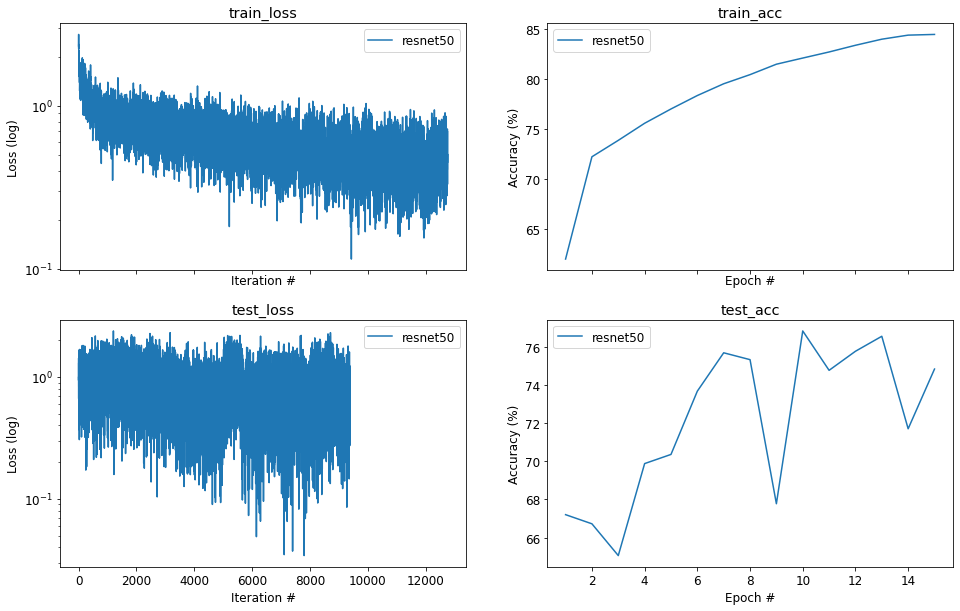

In [ ]:
plot_exp_results('exp5_resnet50.json')

### 6. Extra experiments

In the last part of our project, we tried to enhance our performance by using more layers. First we added more convolutional layers, until we were satisfied, and then we tried to increase the number of hidden layers, hoping we will make additional improvement to our model's performance.

#### 6.1 More Convolutional layers!
First, we used 4 additional convolutional layer with various amount of kernels to determine which kernel size is more effective.

Our hope was that with deeper network, our model would manage to learn more complex features and perform better.

As we assumed, all the different 8-layer models did far better than the 4-layer models. However the results were not decisive to a certain architecture, with 3 architectures having the best performances:
- The model with 8 layers of 128 kernels each achieved a train loss of 0.171 and a train accuracy of 94.4, compared to a test loss of 0.419 and a test accuracy of 88.05.
- The model with 4 initial layers with 128 kernels each and the following 4 layers with 512 kernels each achieved a train loss of 0.160 and a train accuracy of 94.7%, compared to a test loss of 0.420 and a test accuracy of 88.12%.
- The model with 4 initial layers with 256 kernels each and the following 4 layers with 512 kernels each achieved a train loss of 0.154 and a train accuracy of 95%, compared to a test loss of 0.422 and a test accuracy of 88.02%.

common config:  {'run_name': 'exp6_1_filters_[512]_layers_8', 'out_dir': './results', 'seed': 42, 'bs_train': 50, 'bs_test': 12, 'batches': 10000, 'epochs': 30, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0003, 'reg': 0, 'pool_every': 4, 'hidden_dims': [100, 100], 'ycn': True, 'kw': {'optim': 'adam', 'batch_norm': True, 'dropout': 0.5}}


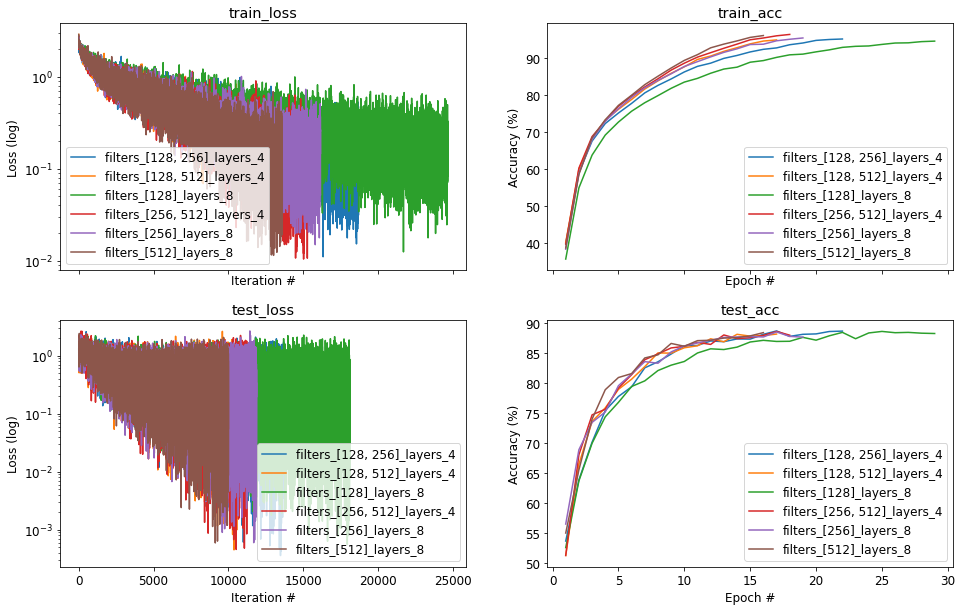

In [ ]:
plot_exp_results('exp6_1*.json')

#### 6.2 Even More Convolutional layers!!
Motivated from the success of the last section, we went even further, experimenting with 12-layer networks.

This time, we decided to try only 2 architectures and choose the best between them.

Lastly, the architecture that performed the best so far, not improving much from the previous experiment, was the one with 12 layers of 128 kernels each.
This model acheived a train loss of 0.174 and a train accuracy of 94.5%, which was a bit worse than other models, but acheived a test loss of 0.416 and a test accuracy of 88.63%.

common config:  {'run_name': 'exp6_2_filters_[128]_layers_12', 'out_dir': './results', 'seed': 42, 'bs_train': 50, 'bs_test': 12, 'batches': 10000, 'epochs': 30, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0003, 'reg': 0, 'pool_every': 4, 'hidden_dims': [100, 100], 'ycn': True, 'kw': {'optim': 'adam', 'batch_norm': True, 'dropout': 0.5}}


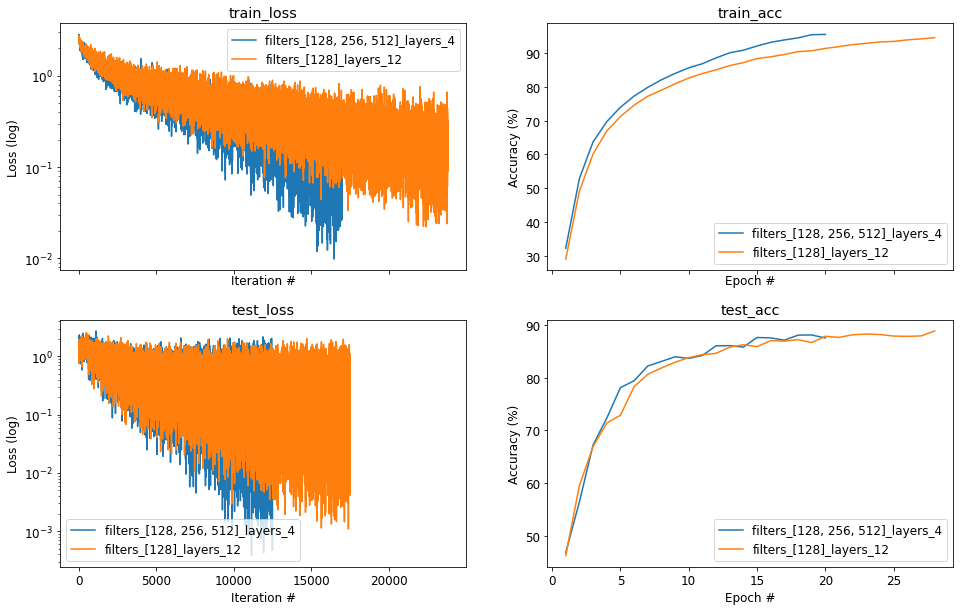

In [ ]:
plot_exp_results('exp6_2*.json')

#### 6.3 More Linear layers
After we finished fine-tuning our feature extractor, we decided to give one last shot of playing around with our linear layers, experimenting with the number of neurons in each layer and the number of layers in total.

The best model was the one with 3 Linear layers with 300 neurons in each layer, which had a slightly worse test accuracy of 88.52% but a far better test loss of 0.401. In addition, it also had a train loss of 0.188, and a train accuracy of 93.9.

common config:  {'run_name': 'exp6_3_hidden_[300, 300]', 'out_dir': './results', 'seed': 42, 'bs_train': 50, 'bs_test': 12, 'batches': 10000, 'epochs': 30, 'early_stopping': 5, 'checkpoints': None, 'lr': 0.0003, 'reg': 0, 'pool_every': 4, 'hidden_dims': [300, 300], 'ycn': True, 'kw': {'optim': 'adam', 'batch_norm': True, 'dropout': 0.5}}


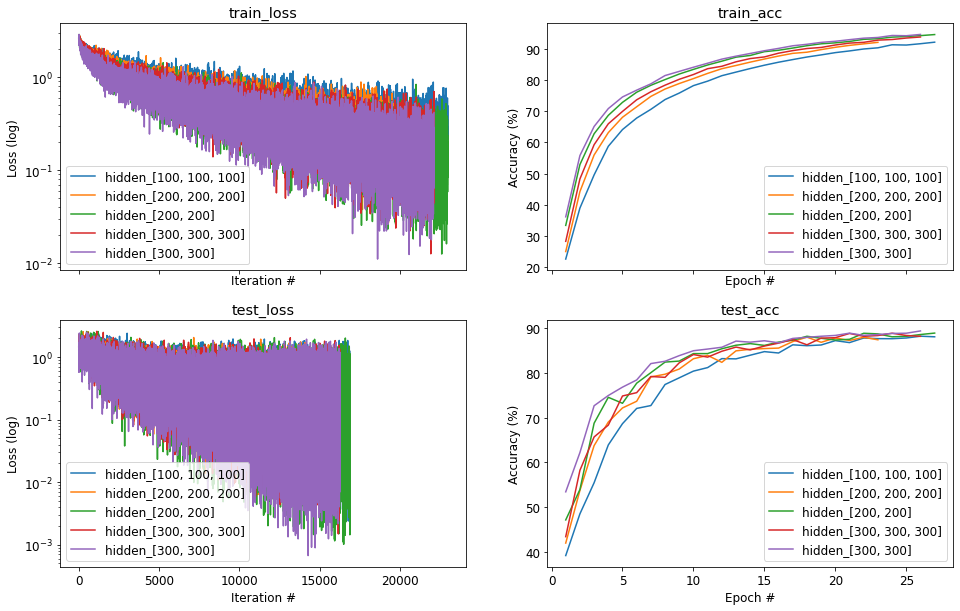

In [ ]:
plot_exp_results('exp6_3*.json')

## Project Summary

- Write a short summerization of your attempts.

In this project, we experimented various architectures of convolutional neural netwroks to determine which one performs better on the CIFAR-10 dataset.

First, we fine-tuned the learning rate hyper parameter along with the optimizer algorithm in order in enhance the learning process. Then, We decided to add Batch Normalization layers to our model, in order to improve our data distribution through the network. Later, we used some regularization techniques inorder to reduce the gap between our train and test performance, ended up choosing the Dropout method. Lastly, we experimented even further by adding more convolutional layer as well as Linear layers, to reach even better results.

In conclusion, we decided that the best architecture was the following:
- 12 convolutional blocks, each block contains a convolutional layer with 128 kernels of size 3 by 3 and a padding of 1 to maintain input size, a ReLU activation function and a Batch Normalization layer with learnable mean and standard deviation.
- A Max Pooling layer with filter size of 2 by 2, every 4 convolutional blocks.
- A Dropout layer, with dropout probability of 0.5, every 4 convolutional blocks.
- 3 Linear layers, each layer contains 300 neurons with ReLU activation function, a Batch Normalization layer with learnable and standard deviation, and a Dropout layer with dropout probability of 0.5.
- The network was trained with Adam optimizer using learning rate value of 0.0003 and no weight decay.